## 911 Emergency Calls Analysis

##### About the 911 Emergency Program:
The National 911 Program's mission is to provide federal leadership and coordination in supporting and promoting optimal 911 services. This Federal "home" for 911 plays a critical role by coordinating federal efforts that support 911 services across the nation.
The National 911 Program is housed within the National Highway Traffic Safety Administration at the U.S. Department of Transportation and is a joint program with the National Telecommunication and Information Administration in the Department of Commerce.

Lets get some insights about the data and start exploring it.

In [127]:
# importing the libraries requried for data processing and fetching insights from it
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings

pd.set_option('display.max_column',None)
pd.set_option('display.width',None)
pd.set_option('display.max_rows',None)


In [128]:
# Importing the dataset into python environment
df=pd.read_csv('911.csv')

In [129]:
# Having a basic look at the data by printing Top 5 records
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [130]:
# Finding the basic information about the data like null values, Data Type of columns and number of records in the dataframe
# and also the missing values if any exists
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [131]:
# Checking the no. of rows and columns of the dataset by using the shape command. 
df.shape

(423909, 9)

In [132]:
# Describing the data by using the describe command and here we pass include='all'  
# so that descriptive statistics for all type of data is fetched.
df.describe(include='all')

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
count,423909.000000,423909.000000,423909,371780.000000,423909,423909,423750,423909,423909.0
unique,NaN,NaN,423837,NaN,141,409544,68,36051,NaN
top,NaN,NaN,GREEN ST & E BASIN ST; NORRISTOWN; Station 30...,NaN,Traffic: VEHICLE ACCIDENT -,2018-10-06 19:26:38,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD,NaN
freq,NaN,NaN,4,NaN,98401,9,36441,4328,NaN
mean,40.158618,-75.314022,NaN,19234.732269,NaN,NaN,NaN,NaN,1.0
std,0.129170,0.656048,NaN,301.388898,NaN,NaN,NaN,NaN,0.0
min,0.000000,-119.698206,NaN,3366.000000,NaN,NaN,NaN,NaN,1.0
25%,40.099784,-75.391547,NaN,19038.000000,NaN,NaN,NaN,NaN,1.0
50%,40.143900,-75.304563,NaN,19401.000000,NaN,NaN,NaN,NaN,1.0
75%,40.229008,-75.210760,NaN,19446.000000,NaN,NaN,NaN,NaN,1.0


In [133]:
# Listing the columns present in the dataframe
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [134]:
# Checking for the missing values in the dataframe. We find the  % of missing values
df.isnull().sum()*100/df.shape[0]

lat           0.000000
lng           0.000000
desc          0.000000
zip          12.297215
title         0.000000
timeStamp     0.000000
twp           0.037508
addr          0.000000
e             0.000000
dtype: float64

In [135]:
# We find the number of records related that are related to specific ZipCode
df['zip'].value_counts()

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
19002.0    13380
19468.0    12393
19046.0    11720
19454.0    11457
19090.0    11149
19038.0    10946
19426.0    10561
19428.0     9494
19006.0     9473
19438.0     8987
19040.0     8590
19462.0     8447
19422.0     8187
19027.0     7819
19001.0     6496
19044.0     6481
19010.0     5692
18964.0     5502
19004.0     5352
19440.0     5339
19096.0     4808
19473.0     4775
19003.0     4700
19444.0     4614
19095.0     4362
19034.0     3898
19525.0     3857
18073.0     3083
18969.0     3078
19072.0     3016
19031.0     2619
19012.0     2590
19025.0     2166
19035.0     2112
19041.0     2102
18074.0     2027
19066.0     2026
19465.0     1948
19460.0     1909
19405.0     1892
18041.0     1752
19075.0     1473
19087.0     1463
18054.0     1458
18076.0     1315
19151.0     1277
19085.0     1199
19150.0     1185
18936.0     1131
18974.0      999
19512.0      904
19131.0      560
19128.0      521
18915.0      4

In [136]:
# Counting the number of records corresponding to specific town.
df['twp'].value_counts()

LOWER MERION         36441
ABINGTON             25835
NORRISTOWN           23883
UPPER MERION         22694
CHELTENHAM           19629
POTTSTOWN            17500
UPPER MORELAND       14707
LOWER PROVIDENCE     14025
PLYMOUTH             12800
UPPER DUBLIN         11910
HORSHAM              11819
WHITEMARSH           11282
MONTGOMERY           11276
UPPER PROVIDENCE     10289
SPRINGFIELD           9673
LIMERICK              9351
WHITPAIN              8639
EAST NORRITON         8607
LANSDALE              7518
HATFIELD TOWNSHIP     7427
TOWAMENCIN            7301
LOWER GWYNEDD         7075
WEST NORRITON         7010
LOWER MORELAND        6929
LOWER POTTSGROVE      6852
FRANCONIA             5911
LOWER SALFORD         5800
UPPER GWYNEDD         5648
CHESTER COUNTY        4676
WORCESTER             3869
DOUGLASS              3620
CONSHOHOCKEN          3590
HATBORO               3496
SKIPPACK              3466
WEST CONSHOHOCKEN     3447
NEW HANOVER           3331
AMBLER                2738
J

In [137]:
# As we can see there are less than 13% missing values we decide to drop those rows.
df=df.dropna()

In [138]:
# Once again we check the no. of rows and columns in the dataframe by using the shape command.
df.shape

(371711, 9)

In [139]:
# Confirming the missing values are removed.
df.isnull().sum()*100/df.shape[0]

lat          0.0
lng          0.0
desc         0.0
zip          0.0
title        0.0
timeStamp    0.0
twp          0.0
addr         0.0
e            0.0
dtype: float64

In [140]:
# Here we split the 'Title' column and derive 2 new columns namely Type_of_call and Emergency_Service
splited_data = df["title"].str.split(":",n=1,expand=True) 
df['type_of_call']=splited_data[0]
df['emer_service']=splited_data[1]

In [141]:
# Once we derive the new columns we drop the parent column.
df.drop(['title'],axis=1,inplace=True)
df.head(3)

,lat,lng,desc,zip,timeStamp,twp,addr,e,type_of_call,emer_service
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK


In [142]:
# We check the number of value counts for specific value in the Type_Of_Call feature
df['type_of_call'].value_counts()

EMS        190278
Traffic    125370
Fire        56063
Name: type_of_call, dtype: int64

In [143]:
# We check the number of value counts for specific value in the Emergency_Service feature
df['emer_service'].value_counts()

 VEHICLE ACCIDENT -              83268
 DISABLED VEHICLE -              24819
 FIRE ALARM                      23070
 FALL VICTIM                     20034
 RESPIRATORY EMERGENCY           20027
 CARDIAC EMERGENCY               19319
 VEHICLE ACCIDENT                14865
 ROAD OBSTRUCTION -              11321
 SUBJECT IN PAIN                 11314
 HEAD INJURY                     10550
 GENERAL WEAKNESS                 6663
 SYNCOPAL EPISODE                 6634
 SEIZURES                         6487
 UNKNOWN MEDICAL EMERGENCY        6425
 ALTERED MENTAL STATUS            5839
 MEDICAL ALERT ALARM              5725
 FIRE INVESTIGATION               5709
 ABDOMINAL PAINS                  5468
 UNCONSCIOUS SUBJECT              5010
 HEMORRHAGING                     4957
 CVA/STROKE                       4925
 OVERDOSE                         4864
 NAUSEA/VOMITING                  4622
 HAZARDOUS ROAD CONDITIONS -      4071
 GAS-ODOR/LEAK                    4064
 CARDIAC ARREST          

In [144]:
# To segregate the date for performing data time analysis on the dataframe we proceed with using the datetime package of python.
# The dt operator has helped us fetch the date , time, hour, day etc. for our analysis
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [145]:
# Importing the datetime library to perform analysis
import datetime as dt

In [146]:
# Fetching and converting the datatype for respective features. Also derived some new features based on the timestamp feature
df['zip'] = df['zip'].astype('int64')
df['date']=df['timeStamp'].dt.date
df['month']=df['timeStamp'].dt.month
df['year']=df['timeStamp'].dt.year
df['time']=df['timeStamp'].dt.time
df['hour']=df['timeStamp'].dt.hour
df['weekday']=df['timeStamp'].dt.weekday

In [147]:
# Replacing the numeric value with the categorical value for ease of plotting
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
month_name=['January','February','March','April','May','June','July','August','September','October','November','December']
def dayname(x):
    if x==1:
        return day_name[0]
    elif x==2:
        return day_name[1]
    elif x==3:
        return day_name[2]
    elif x==4:
        return day_name[3]
    elif x==5:
        return day_name[4]
    elif x==6:
        return day_name[5]
    elif x==7:
        return day_name[6]
def monthname(x):
    if x==1:
        return month_name[0]
    elif x==2:
        return month_name[1]
    elif x==3:
        return month_name[2]
    elif x==4:
        return month_name[3]
    elif x==5:
        return month_name[4]
    elif x==6:
        return month_name[5]
    elif x==7:
        return month_name[6]
    elif x==8:
        return month_name[7]
    elif x==9:
        return month_name[8]
    elif x==10:
        return month_name[9]
    elif x==11:
        return month_name[10]
    elif x==12:
        return month_name[11]
    
def time_period(x):
    'divide the time of the day into four categories'
    if x < 5:
        return "Pre_Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day_Time"
    elif 17 <= x < 22:
        return "Evening"
    else:
        return "Late_Night"
    
df['weekday_name']=df['weekday'].apply(lambda x:dayname(x))
df['time_slot'] = df['hour'].apply(lambda x: time_period(x))
df['month']=df['month'].apply(lambda x:monthname(x))

In [148]:
# Dropping the original features using which the derived features were found
df.drop(columns=['timeStamp','hour'],inplace=True)

In [149]:
df.head()

,lat,lng,desc,zip,twp,addr,e,type_of_call,emer_service,date,month,year,time,weekday,weekday_name,time_slot
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015-12-10,December,2015,17:10:52,3,Wednesday,Evening
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015-12-10,December,2015,17:29:21,3,Wednesday,Evening
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015-12-10,December,2015,14:39:21,3,Wednesday,Day_Time
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015-12-10,December,2015,16:47:36,3,Wednesday,Day_Time
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,HEAD INJURY,2015-12-10,December,2015,15:39:04,3,Wednesday,Day_Time


# Questions: 

In [150]:
# How many different types of calls.
a1=df['type_of_call'].value_counts()
a1

EMS        190278
Traffic    125370
Fire        56063
Name: type_of_call, dtype: int64

In [151]:
# Extract the date and time regarding the calls
a2=df[['date','time']].head()
a2

,date,time
0,2015-12-10,17:10:52
1,2015-12-10,17:29:21
2,2015-12-10,14:39:21
3,2015-12-10,16:47:36
5,2015-12-10,15:39:04


In [152]:
# At what time of day/month I can expect which type of call.
a3=pd.DataFrame(df.groupby(['month','type_of_call'])['month'].count().sort_values(ascending =False))
a3

,,month
month,type_of_call,
January,EMS,16966
October,EMS,16800
July,EMS,16493
March,EMS,16396
August,EMS,16355
May,EMS,16204
September,EMS,16012
June,EMS,15970
April,EMS,15770


We can see theType of calls made during different month in an Descending order and with their month.

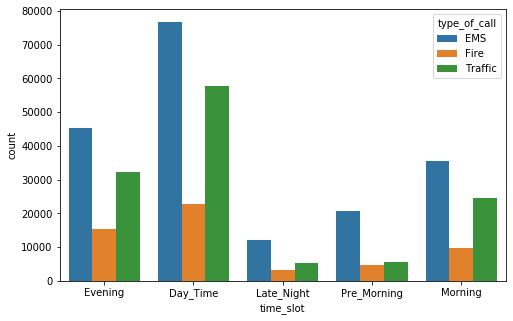

In [153]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df,x='time_slot',hue='type_of_call')
plt.show()

Here we can see the type_of_call that was received by 911 team during different time of the day and we can makeout from the graph that the EMS calls were the highest followed by Traffic and lastly the Fire calls.

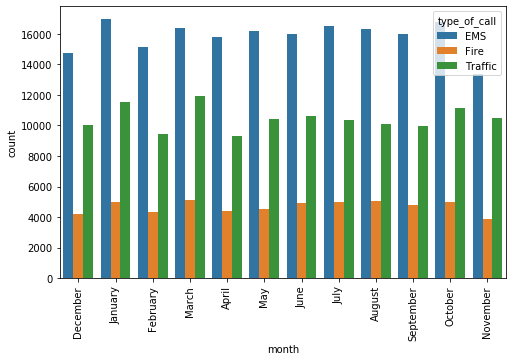

In [154]:
plt.figure(figsize=(8, 5))
sns.countplot(x = 'month', hue = 'type_of_call', data =df)
plt.xticks(rotation=90)
plt.show()

In the above plot we can see the type_of_calls made during different months

- The highest calls are EMS which are being made and as per the data listed below we can makeout that the EMS calls are mainly
observed during the January  month. 
- As that is the period when most of the people are going out on a holiday/vacation trip we can see rise in EMS services. 
- The 911 services team must be ready to observe the EMS calls mostly during the December, January and February months.

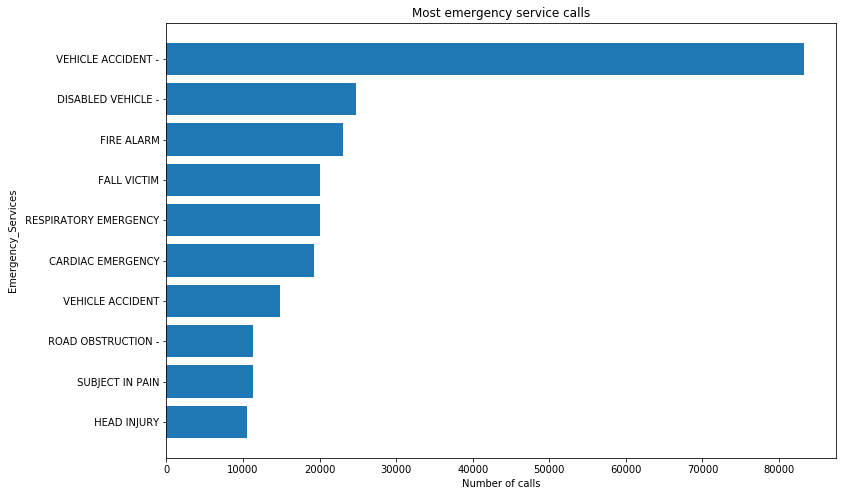

In [155]:
# Visualize the percentage share of emergency type for each call.
df1 = df['emer_service'].value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df1.index)
y = list(df1.values)
x.reverse()
y.reverse()

plt.title("Most emergency service calls")
plt.ylabel("Emergency_Services")
plt.xlabel("Number of calls")

plt.barh(x, y)
plt.show()

In the above plot we can see the emergency calls received against difference emergency services. 
As we can see the Vehicle accidents are one of the major reasons for emergency services.
911 team must focus more on making the traffic rules strict and people breaking the rules must be punished heavily. 

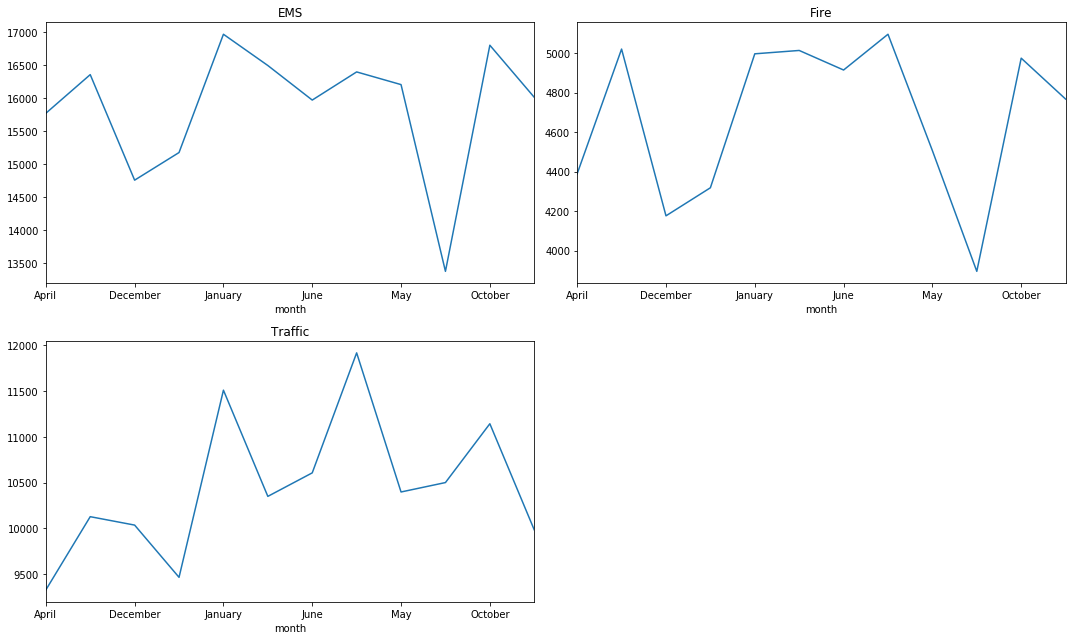

In [156]:
plt.figure(figsize=(15, 9))
for i, j in enumerate(df['type_of_call'].unique(), 1):
    plt.subplot(2, 2, i)
    df[df['type_of_call']==j].groupby('month').count()['twp'].plot()
    plt.title(j)
    plt.tight_layout()

From the above plot we can make out the peaks/rise in emergency calls in the city on diffrent months. We can observe the rise of calls according to the type of call.

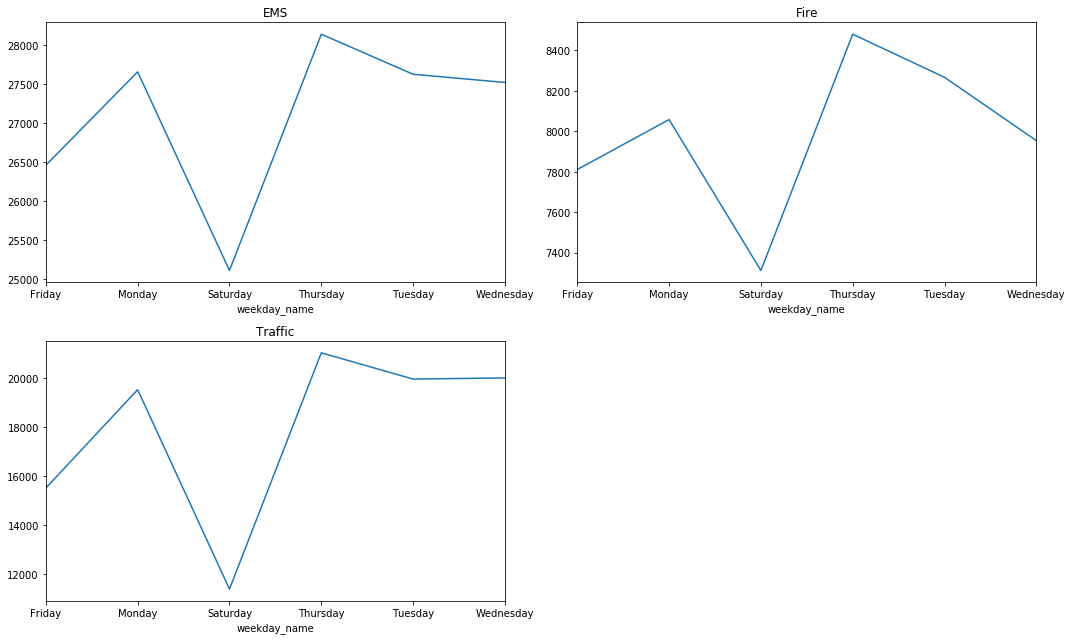

In [159]:
plt.figure(figsize=(15, 9))
for i, j in enumerate(df['type_of_call'].unique(), 1):
    plt.subplot(2, 2, i)
    df[df['type_of_call']==j].groupby('weekday_name').count()['twp'].plot()
    plt.title(j)
    plt.tight_layout()

From the above plot we can make out the peaks/rise in emergency calls in the city on diffrent days. We can observe the rise of calls according to the type of call.

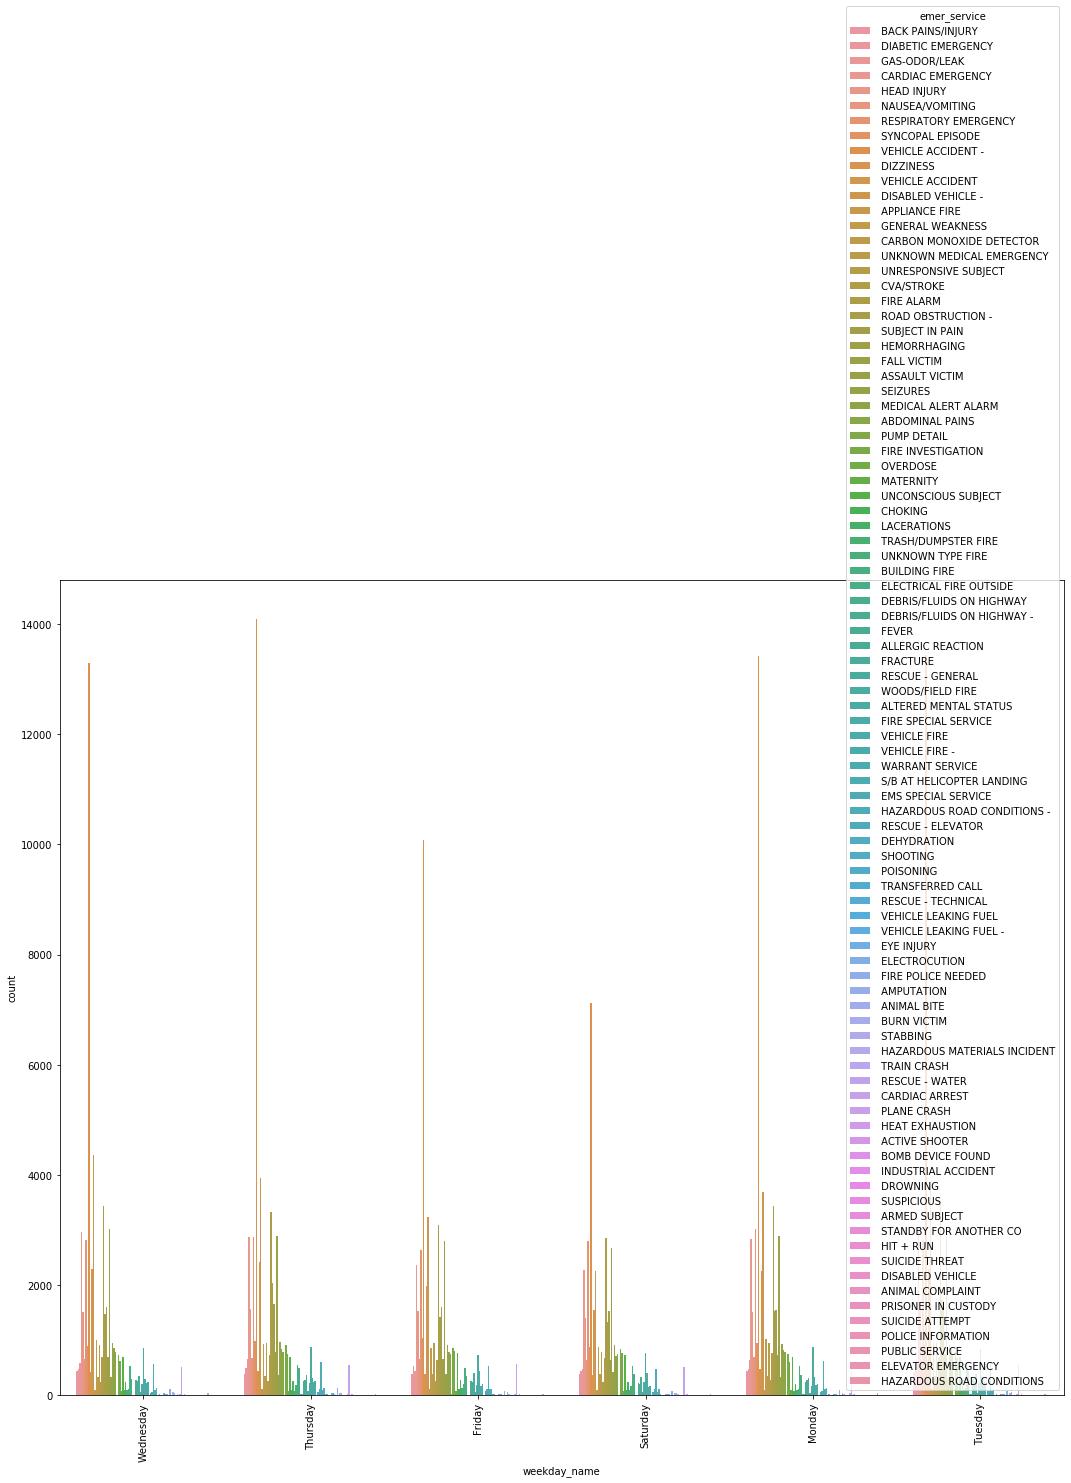

In [160]:
plt.figure(figsize=(18, 15))
sns.countplot(x = df['weekday_name'], hue = "emer_service", data =df)
plt.xticks(rotation=90)
plt.show()